In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
# from pytrends.request import TrendReq

In [2]:
movies = pd.read_csv("imdb_top_1000.csv")

names = movies["Series_Title"]
years = movies["Released_Year"]
imdb = movies["IMDB_Rating"]
metarating = movies["Meta_score"]
gross = movies["Gross"]


directors = []
for x in movies["Director"]:
    if x not in directors:
        directors.append(x)

MeanRatings = []
for x in directors:
    # DirectorX eh uma variavel temporaria usada apenas neste loop
    DirectorX = movies[movies["Director"] == x]
    MeanRatings.append(np.mean(DirectorX["IMDB_Rating"]))


[('Frank Darabont', array([-0.04970906,  3.08301371])), ('Francis Ford Coppola', array([0.03469571, 1.51376185])), ('Christopher Nolan', array([0.01067077, 1.93259219])), ('Sidney Lumet', array([-0.05798833,  3.07601363])), ('Peter Jackson', array([ 0.38598042, -5.42877455])), ('Quentin Tarantino', array([-1.70150894e-03,  2.13057244e+00])), ('Steven Spielberg', array([0.01764366, 1.74981511])), ('David Fincher', array([-0.01023622,  2.26880659])), ('Robert Zemeckis', array([ 0.1151279 , -0.10628903])), ('Sergio Leone', array([0.02423779, 1.73519819])), ('Martin Scorsese', array([0.02023875, 1.75180184])), ('Milos Forman', array([0.06130386, 1.02711662])), ('Bong Joon Ho', array([0.0078535 , 1.99306655])), ('Hayao Miyazaki', array([-0.00558866,  2.18048139])), ('Jonathan Demme', array([ 0.2104665, -1.7815923])), ('Akira Kurosawa', array([-1.91042662e-03,  2.14301647e+00])), ('Frank Capra', array([2.10091322e-16, 2.09186406e+00])), ('Todd Phillips', array([ 0.51943277, -8.05691203])), (

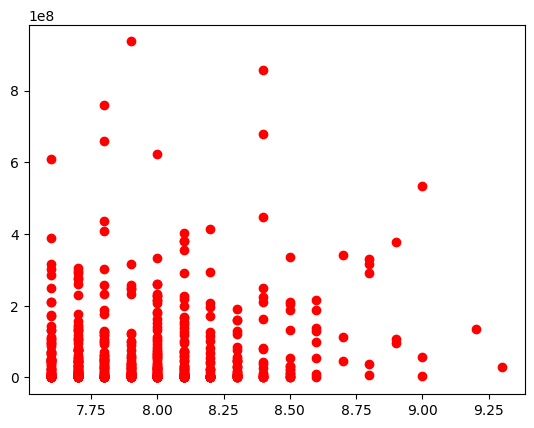

In [3]:
# Initialize lists to store data
director_coefficients = []
all_bilheteriaOrdenada = []
all_imdb_ratings = []

# Iterate through directors
for x in directors:
    # Filter movies for the current director
    tempData = movies[movies["Director"] == x]

    # Remove rows with NaN values in the "Gross" column
    tempData = tempData.dropna(subset=["Gross"])

    # Convert "Gross" values to integers after removing commas
    bilheteriaOrdenada = [int(str(x).replace(',', ''))
                          for x in tempData["Gross"]]

    # Extract IMDB ratings
    imdb_ratings = tempData["IMDB_Rating"]

    # Check if there are enough data points to fit a linear regression model
    if len(bilheteriaOrdenada) > 1:
        # Plot the data points
        plt.plot(imdb_ratings, bilheteriaOrdenada, 'ro')

        # Fit a linear regression model
        coefficients = np.polyfit(
            np.log(bilheteriaOrdenada), np.log(imdb_ratings.to_list()), 1)

        for bilheteria in bilheteriaOrdenada:
            all_bilheteriaOrdenada.append(bilheteria)
        for rate in imdb_ratings.to_list():
            all_imdb_ratings.append(rate)

        # Append the coefficients to the list
        director_coefficients.append((x, coefficients))

all_coefficients = coefficients = np.polyfit(
    all_bilheteriaOrdenada, all_imdb_ratings, 1)
print(director_coefficients)

C:\Users\gusta\AppData\Local\Temp\ipykernel_7960\3890523144.py:3: RuntimeWarning: divide by zero encountered in log
  return director_coefficient[1][0]*np.log(x) + director_coefficient[1][1]


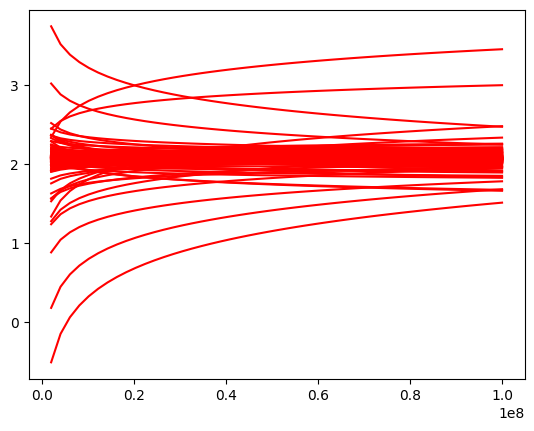

In [4]:
for director_coefficient in director_coefficients:
    def f(x):
        return director_coefficient[1][0]*np.log(x) + director_coefficient[1][1]

    if director_coefficient[1][0] > 10 or director_coefficient[1][1] > 10:
        continue

    # ax = plt.subplots()
    # ax.plot(x, f(x))
    # ax.set_xscale('log')

    x = np.linspace(0, 10**8)
    plt.plot(x, f(x), color='red')
    # plt.ylim(7, 10)

(7.0, 10.0)

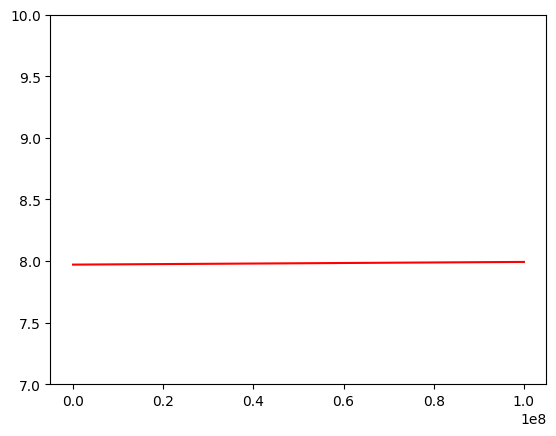

In [5]:
def f(x):
    return all_coefficients[0]*x + all_coefficients[1]


x = np.linspace(0, 10**8)
plt.plot(x, f(x), color='red')
plt.ylim(7, 10)

In [6]:
for x in director_coefficients:
    p = np.poly1d([x[1][0], x[1][1]])
    print(p)

 
-0.04971 x + 3.083
 
0.0347 x + 1.514
 
0.01067 x + 1.933
 
-0.05799 x + 3.076
 
0.386 x - 5.429
 
-0.001702 x + 2.131
 
0.01764 x + 1.75
 
-0.01024 x + 2.269
 
0.1151 x - 0.1063
 
0.02424 x + 1.735
 
0.02024 x + 1.752
 
0.0613 x + 1.027
 
0.007853 x + 1.993
 
-0.005589 x + 2.18
 
0.2105 x - 1.782
 
-0.00191 x + 2.143
 
2.101e-16 x + 2.092
 
0.5194 x - 8.057
 
-0.02479 x + 2.546
 
0.02749 x + 1.643
 
-0.0005997 x + 2.1
 
0.02174 x + 1.798
 
-0.02965 x + 2.643
 
-0.08368 x + 3.545
 
-0.01418 x + 2.36
 
0.01614 x + 1.88
 
0.04269 x + 1.472
 
0.0006438 x + 2.087
 
-0.05393 x + 2.887
 
-0.005865 x + 2.203
 
0.009184 x + 1.978
 
0.08364 x + 0.413
 
-0.03531 x + 2.805
 
0.005612 x + 2.017
 
-0.06841 x + 3.444
 
0.0208 x + 1.814
 
-0.003367 x + 2.167
 
0.003815 x + 2.043
 
-0.02518 x + 2.554
 
-0.04209 x + 2.682
 
0.004817 x + 2.008
 
-0.01622 x + 2.362
 
0.05232 x + 1.21
 
-0.01882 x + 2.406
 
-0.01181 x + 2.287
 
-0.1989 x + 5.91
 
0.1529 x - 0.661
 
-0.018 x + 2.403
 
0.08279 x + 0.5525
